# List Img

In [1]:
folder = 'demo_img/'

In [2]:
import glob
fnames = glob.glob(folder+"*.png")
fnames

['demo_img/3.png', 'demo_img/2.png', 'demo_img/1.png']

# Show Img - PIL &  matplotlib

In [3]:
from IPython.display import display

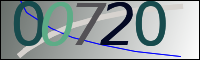

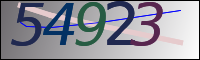

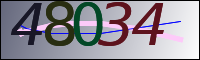

In [4]:
# with Pillow
from PIL import Image

for fn in fnames:
    img = Image.open(fn)
    display(img)

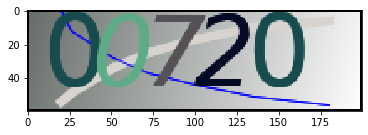

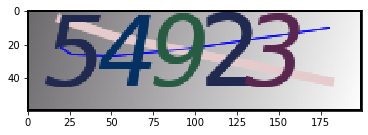

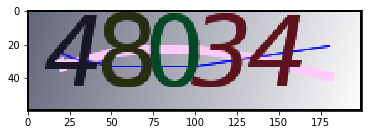

In [5]:
# with matplotlib
import matplotlib.pyplot as plt

for fn in fnames:
    img = plt.imread(fn)
    plt.imshow(img)
    plt.show()

如果把 plt.show() 註解掉...`

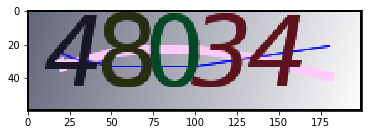

In [6]:
# with matplotlib
import matplotlib.pyplot as plt

for fn in fnames:
    img = plt.imread(fn)
    plt.imshow(img)
    #plt.show()

cv2 的 show_img 會另開新視窗, 不能在這個平台用, 用前兩者就好

# Read Img - PIL &  cv2

In [7]:
from PIL import Image
import numpy as np

img = Image.open(fnames[0])
print("PIL Type:",type(img))

imgarr = np.array(img) 
print(type(imgarr), imgarr.shape)

PIL Type: <class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'> (60, 200, 3)


In [8]:
import cv2

img = cv2.imread(fnames[0])
print("cv2 Type:",type(img))
print("cv2 array shape:",img.shape)

cv2 Type: <class 'numpy.ndarray'>
cv2 array shape: (60, 200, 3)


cv2 array shape: (60, 200, 3)


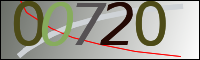

Note: PIL 預設讀進來是 RGB, cv2 預設讀進來是 BGR
轉成 RGB..


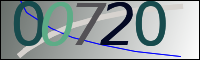

In [9]:
import cv2

img_cv = cv2.imread(fnames[0])
print("cv2 array shape:",imgarr.shape)

display(Image.fromarray(img_cv)) # show by PIL
print("Note: PIL 預設讀進來是 RGB, cv2 預設讀進來是 BGR")

img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
print("轉成 RGB..")
display(Image.fromarray(img_rgb)) # show by PIL

# 二值化 Covert Img - PIL &  cv2

PNG (200, 60) RGB


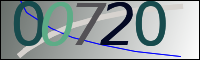

In [10]:
from PIL import Image
img = Image.open(fnames[0])
print(img.format, img.size, img.mode)
img

None (200, 60) L


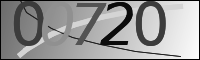

In [11]:
# PIL to binary
img_gray = img.convert('L')
print(img_gray.format, img_gray.size, img_gray.mode)
img_gray

cv2 array shape: (60, 200)


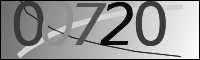

In [12]:
# cv2 read as binary
import cv2

imgarr_gray = cv2.imread(fnames[0], cv2.IMREAD_GRAYSCALE)
# or, imgarr_gray = cv2.imread(fnames[0],0)

print("cv2 array shape:",imgarr_gray.shape)

Image.fromarray(imgarr_gray) # show by PIL

cv2 array shape: (60, 200, 3)
cv2 array shape: (60, 200)


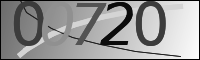

In [13]:
# cv2 to binary
import cv2

imgarr_bgr = cv2.imread(fnames[0])
print("cv2 array shape:",imgarr_bgr.shape)

img_L = cv2.cvtColor(imgarr_bgr, cv2.COLOR_BGR2GRAY)
print("cv2 array shape:",img_L.shape)

Image.fromarray(img_L.astype(np.uint8)) # show by PIL

cv2 array shape: (60, 200)


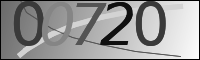

In [14]:
# cv2 to binary (Process img in the form of Array)
imgarr_gray = np.mean(imgarr_bgr, 2)
print("cv2 array shape:",imgarr_gray.shape)

Image.fromarray(imgarr_gray.astype(np.uint8)) # show by PIL

# 使用濾鏡 & Save Img - PIL &  cv2

In [15]:
# PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageFilter
resize = lambda x,size : x.resize(size, Image.ANTIALIAS) #改變大小
blur = lambda x:  x.filter(ImageFilter.BLUR) #模糊化
enh_con = lambda x,r: ImageEnhance.Contrast(x).enhance(r)#对比度增强
enh_sha = lambda x,r:ImageEnhance.Sharpness(x).enhance(r)   #锐度增强
edge_filter = lambda x: x.filter(ImageFilter.FIND_EDGES) #邊緣增強
smooth_filter = lambda x: x.filter(ImageFilter.SMOOTH) #平滑

orig..


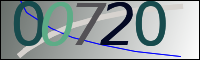

resize..


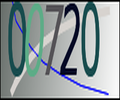

blur..


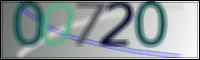

enh_con..


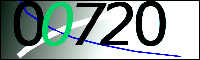

enh_sha..


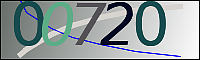

edge_filter..


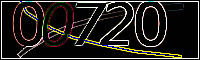

smooth_filter..


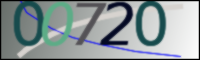

In [16]:
# PIL
print("orig..")
img = Image.open(fnames[0])
display(img) # show by PIL

print("resize..")
img_ = resize(img, (120,100))
display(img_) # show by PIL

print("blur..")
img_ = blur(img)
display(img_) # show by PIL

print("enh_con..")
img_ = enh_con(img, 3.0)
display(img_) # show by PIL

print("enh_sha..")
img_ = enh_sha(img, 2.0)
display(img_) # show by PIL

print("edge_filter..")
img_ = edge_filter(img)
display(img_) # show by PIL

print("smooth_filter..")
img_ = smooth_filter(img)
display(img_) # show by PIL


orig..


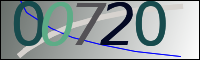

resize..


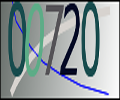

edge_filter..


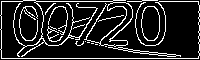

In [17]:
# cv2 
import cv2
resize = lambda x,size: cv2.resize(x,size, interpolation = cv2.INTER_CUBIC)
edge_filter = lambda x: cv2.Canny(x,100,200)

print("orig..")
img = cv2.imread(fnames[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR 2 RGB
display(Image.fromarray(img.astype(np.uint8))) # show by PIL

print("resize..")
img_ = resize(img, (120,100))
display(Image.fromarray(img_.astype(np.uint8))) # show by PIL

print("edge_filter..")
img_ = edge_filter(img)
display(Image.fromarray(img_.astype(np.uint8))) # show by PIL

雖然也有很多現成的濾鏡, 但是若只依賴現成的濾鏡是不夠的..

In [18]:
# cv2 smooth with 2D Convolution
def smooth(img, kernel_size=(5,5)):
    # 2D Convolution ( Image Filtering )
    kernel = np.ones(kernel_size,np.float32)/np.product(kernel_size)
    dst = cv2.filter2D(img,-1,kernel)
    return dst 

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/220e403e44b16ea8e05d350c4ce69e9aedff5bd1.png)

<img src="https://pic1.xuehuaimg.com/proxy/csdn/https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/full_padding_no_strides.gif" width=200/>

smooth..


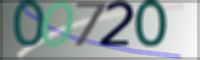

In [19]:
print("smooth..")
img_ = smooth(img)
display(Image.fromarray(img_.astype(np.uint8))) # show by PIL

smooth, kernel_size=(1,1)


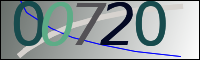

smooth, kernel_size=(2,2)


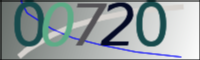

smooth, kernel_size=(3,3)


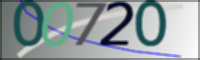

smooth, kernel_size=(4,4)


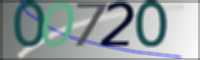

smooth, kernel_size=(5,5)


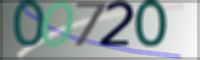

smooth, kernel_size=(6,6)


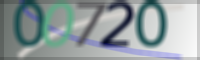

smooth, kernel_size=(7,7)


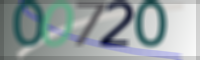

smooth, kernel_size=(8,8)


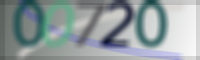

smooth, kernel_size=(9,9)


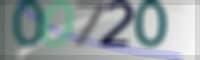

smooth, kernel_size=(10,10)


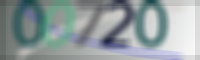

In [20]:
# 改變 kernel 大小
for i in range(1,11):
    print(f"smooth, kernel_size=({i},{i})")
    img_ = smooth(img,(i,i))
    display(Image.fromarray(img_.astype(np.uint8))) # show by PIL

edge_filter_3x3


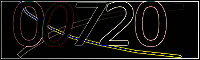

edge_filter_5x5


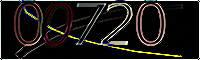

In [21]:
# cv2 smooth with 2D Convolution
#可以嘗試設計自己的 kernel!!
def edge_filter_3x3(img):
    kernel = np.array([[0,-1,0], 
                       [-1,4,-1], 
                       [0,-1,0]])
    dst = cv2.filter2D(img,-1,kernel)
    return dst

def edge_filter_5x5(img):
    kernel = np.array([[0,0,1,0,0], 
                       [0,1,-2,1,0], 
                       [1,-2,0,-2,1],
                       [0,1,-2,1,0], 
                       [0,0,1,0,0]])
    dst = cv2.filter2D(img,-1,kernel)
    return dst 

print(f"edge_filter_3x3")
img_ = edge_filter_3x3(img)
display(Image.fromarray(img_.astype(np.uint8))) # show by PIL

print(f"edge_filter_5x5")
img_ = edge_filter_5x5(img)
display(Image.fromarray(img_.astype(np.uint8))) # show by PIL

# Save Img - PIL & cv2 

orig..


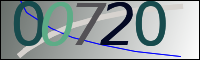

blur..


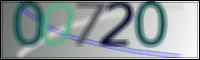

In [22]:
# PIL
from PIL import Image
print("orig..")
img = Image.open(fnames[0])
display(img) # show by PIL

print("blur..")
img_ = img.filter(ImageFilter.BLUR) #模糊化

img_.save("pil.png") #save
Image.open("pil.png")

orig(BGR)..


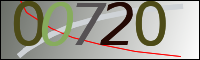

edge_filter..


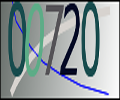

In [23]:
# cv2
import cv2

print("orig(BGR)..")
img = cv2.imread(fnames[0])
display(Image.fromarray(img.astype(np.uint8))) # show by PIL

print("edge_filter..")
img_ = cv2.resize(img, (120,100), interpolation = cv2.INTER_CUBIC)

cv2.imwrite('cv2.png',img_) #save
Image.open("cv2.png")